# Phase 3: Data Preparation – Craigslist Cars & Trucks Dataset

## 1. Load and Select Data

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../../downloads/archive/vehicles.csv")
df.head()


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


## 2. Clean the Data

In [3]:

# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Drop rows missing essential fields
df = df.dropna(subset=['price', 'year', 'odometer', 'manufacturer'])

# Handle missing categorical values (optional)
df.fillna({'condition': 'unknown', 'fuel': 'unknown', 'title_status': 'unknown'}, inplace=True)


## 3. Handle Outliers

In [4]:

# Filter out unrealistic values for price and odometer
df = df[(df['price'] > 500) & (df['price'] < 100000)]
df = df[(df['odometer'] > 0) & (df['odometer'] < 300000)]


## 4. Remove Unnecessary Features

In [5]:

columns_to_drop = ['id', 'url', 'image_url', 'description', 'lat', 'long']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])


## 5. Construct New Features

In [6]:

# Add car age
df['car_age'] = 2025 - df['year']


## 6. Format Data

In [7]:

# Convert columns to category dtype
categorical_cols = ['manufacturer', 'condition', 'fuel', 'title_status',
                    'transmission', 'drive', 'size', 'type', 'paint_color', 'state']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')


## 7. Perform Data Scaling

In [8]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['odometer_scaled'] = scaler.fit_transform(df[['odometer']])
df['car_age_scaled'] = scaler.fit_transform(df[['car_age']])


## 8. Visualize After Preprocessing

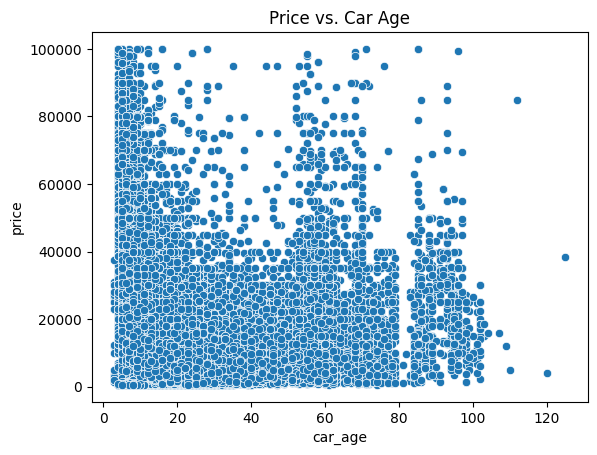

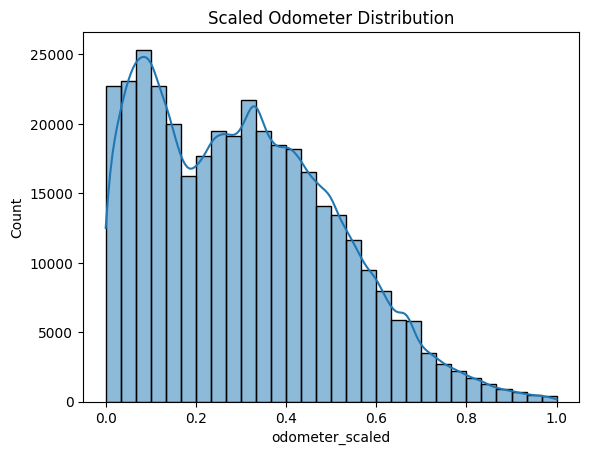

In [9]:

# Visualize price vs. car age
sns.scatterplot(data=df, x='car_age', y='price')
plt.title("Price vs. Car Age")
plt.show()

# Histogram of scaled odometer
sns.histplot(df['odometer_scaled'], bins=30, kde=True)
plt.title("Scaled Odometer Distribution")
plt.show()


## 9. Create Classification Variable (Optional)

In [10]:

# Create binary classification label for 'cheap' vs. 'expensive'
median_price = df['price'].median()
df['price_category'] = df['price'].apply(lambda x: 'cheap' if x < median_price else 'expensive')
